<a href="https://colab.research.google.com/github/ivinitus/Cashflow-forecasting/blob/main/COLAB/Random_forrest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Random Forest MAE: 20.14767517929955
Random Forest MSE: 679.8654883259785
Random Forest R-squared: -0.051418155529334264
     Actual Cash Flow  Predicted Cash Flow (Random Forest)
521          4.642522                             9.239331
737        -23.811609                            -4.501213
740          5.661871                            -4.043727
660        -24.201522                             1.165261
411         17.319680                            -3.818181


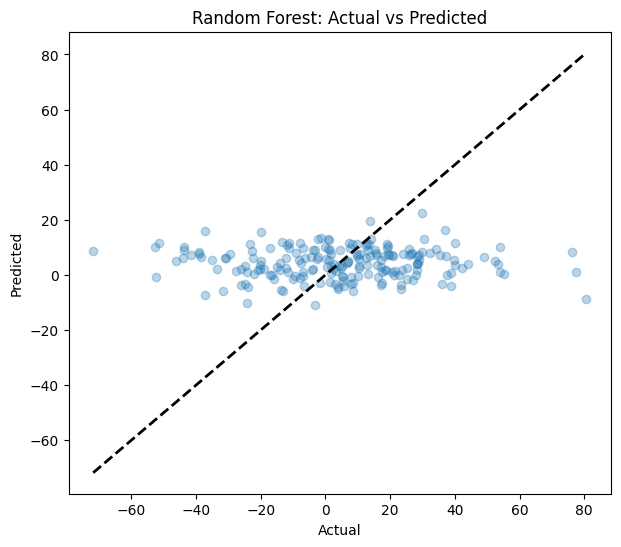

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def load_data(file_path):
    """Load the dataset from a CSV file."""
    return pd.read_csv(file_path)

def define_features_and_target(data):
    """Define the features and target variable."""
    features = [
        'Revenue/Sales', 'Total Income', 'Tax', 'Net Profit', 'Accounts Receivable',
        'Accounts Payable', 'Total Expenditure', 'Interest', 'GDP Growth',
        'Inflation/Interest Rate', 'Expenses', 'Cap. Expenditure', 'Seasonality',
        'Client Payment Trends', 'EBIT'
    ]
    target = 'Cash Flow'
    X = data[features]
    y = data[target]
    return X, y

def split_data(X, y, test_size=0.2, random_state=42):
    """Split the data into training and testing sets."""
    return train_test_split(X, y, test_size=test_size, random_state=random_state)

def train_random_forest(X_train, y_train):
    """Train a Random Forest model."""
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)
    return rf

def evaluate_model(y_test, y_pred):
    """Evaluate the model performance."""
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return mae, mse, r2

def plot_results(y_test, y_pred):
    """Plot the actual vs predicted results."""
    plt.figure(figsize=(7, 6))
    plt.scatter(y_test, y_pred, alpha=0.3)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Random Forest: Actual vs Predicted')
    plt.show()

def main():
    # File path
    file_path = '/content/cash_flow_data_ final.csv'

    # Load the data
    data = load_data(file_path)

    # Define features and target
    X, y = define_features_and_target(data)

    # Split the data
    X_train, X_test, y_train, y_test = split_data(X, y)

    # Train Random Forest
    rf_model = train_random_forest(X_train, y_train)

    # Make predictions
    y_pred_rf = rf_model.predict(X_test)

    # Evaluate Random Forest
    mae_rf, mse_rf, r2_rf = evaluate_model(y_test, y_pred_rf)
    print(f'Random Forest MAE: {mae_rf}')
    print(f'Random Forest MSE: {mse_rf}')
    print(f'Random Forest R-squared: {r2_rf}')

    # Adding predicted cash flow values to the data
    results_rf = pd.DataFrame({
        'Actual Cash Flow': y_test,
        'Predicted Cash Flow (Random Forest)': y_pred_rf
    })

    # Display the first few rows of the predictions
    print(results_rf.head())

    # Plot the results
    plot_results(y_test, y_pred_rf)

if __name__ == "__main__":
    main()
